In [84]:
import pandas as pd 
import numpy as numpy
import yfinance as yf
import matplotlib.pyplot as plt
import plotly.express as px
import datetime

from statsmodels.tsa.seasonal import seasonal_decompose

In [85]:
today = datetime.datetime.now()
tickers = ['SOL-USD', 'ETH-USD']
df = yf.download(tickers, start="2024-01-01", end=today)['Adj Close']

df.reset_index(inplace=True)
df.to_csv('coin_volatilities.csv', index=False)

df.head()

[*********************100%***********************]  2 of 2 completed


Ticker,Date,ETH-USD,SOL-USD
0,2024-01-01,2352.327881,109.508682
1,2024-01-02,2355.836426,106.611221
2,2024-01-03,2210.761963,98.594437
3,2024-01-04,2269.038086,105.077538
4,2024-01-05,2268.647217,99.978790


In [86]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=df['Date'], y=df['ETH-USD'], name='Ethereum (ETH)', line=dict(color='blue')),
    secondary_y=False
)
fig.add_trace(
    go.Scatter(x=df['Date'], y=df['SOL-USD'], name='Solana (SOL)', line=dict(color='orange')),
    secondary_y=True
)
fig.update_layout(
    title_text="Comparação ETH vs SOL com Eixos Duplos",
    xaxis_title="Data",
)

fig.update_yaxes(title_text="Ethereum (USD)", secondary_y=False)
fig.update_yaxes(title_text="Solana (USD)", secondary_y=True)

fig.show()

In [87]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df['eth_norm'] = scaler.fit_transform(df[['ETH-USD']])
df['sol_norm'] = scaler.fit_transform(df[['SOL-USD']])

fig = px.line(df, x='Date', y=['eth_norm', 'sol_norm'], title='Norm process ETH vs SOL')
fig.show()


In [88]:
df['Month'] = df['Date'].dt.to_period('M')

monthly_avg = df.groupby('Month').mean().reset_index()

month_avg_adjust = monthly_avg[['Month', 'ETH-USD', 'SOL-USD']]

month_avg_adjust['eth_growth'] = month_avg_adjust['ETH-USD'].pct_change() * 100
month_avg_adjust['sol_growth'] = month_avg_adjust['SOL-USD'].pct_change() * 100

#month_avg_adjust.dropna(inplace=True)
month_avg_adjust.set_index('Month', inplace=True)

fig = px.line(month_avg_adjust, x=month_avg_adjust.index.to_timestamp(), y=['eth_growth', 'sol_growth'], title='Monthly Average Growth')
fig.show()

/tmp/ipykernel_11935/1745881060.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_11935/1745881060.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



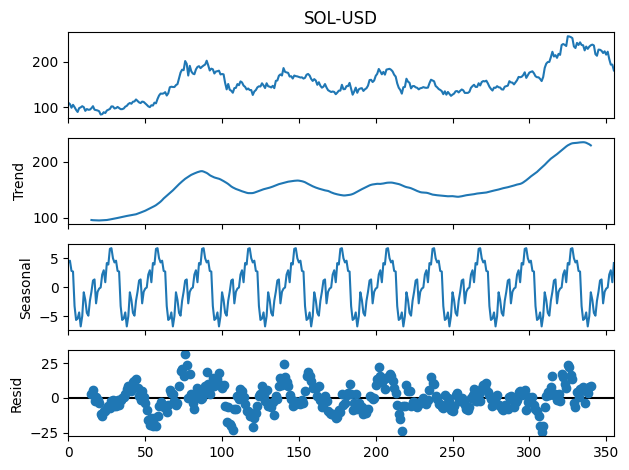

In [93]:
sol_additive = seasonal_decompose(df['SOL-USD'], model='additive', period=30)

addtive_sol = sol_additive.plot()

# Conteúdo sobre a SOL 

https://changelly.com/blog/pt-br/previsao-de-preco-solana-sol-2023-2030/

Já vimos que a SOL teve uma taxa de crescimento interessante comparada ao Ethereum, sendo um cripto ativo que pode ser valorizado no futuro.

Tendo bastante potencial para crescer, a SOL é uma boa opção para investir em criptomoedas.


Solana com alto desempenho em blockchain, projetada para escalabilidade e velocidade.
Uma velocidade de transação com PoH (Proof of History) e um sistema de consenso de rede.
combinado com Proof-of-Staked (PoS) para garantir a segurança e a eficiência da rede.

Um ponto a considerar, com baixa taxa de transação extremamente baixa, com média de 0,00025 dólares.

Torna atraente ao Ethereum, onde tem altas taxas de gás, como um desafio para os usuários.

# Eficiência energética da moeda.

Design de eficiência energética, consumindo muito menos energia do que os blockchains de prova de trabalho (PoW) tradicionais.

Mais sustentável para usuários e desenvolvedores.
